Actividad R-Lineal Final
Diego Rosas A01634154

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

df=pd.read_csv('breast_cancer.csv')

In [119]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [120]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

La base de datos está completa.

In [121]:
df.drop(['id','diagnosis'],axis=1,inplace=True)

In [122]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
df.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'}, inplace=True)


In [124]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [125]:
correlacion=df.corr()

In [126]:
alta_corr = np.where((correlacion>0.95)&(correlacion<1))

In [127]:
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

Se estandariza ya que hay alta correlación entre variables (no son independientes)

In [128]:
scaler = StandardScaler()

In [129]:
df_estandar=scaler.fit_transform(df)

In [130]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [131]:
df_estandar

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


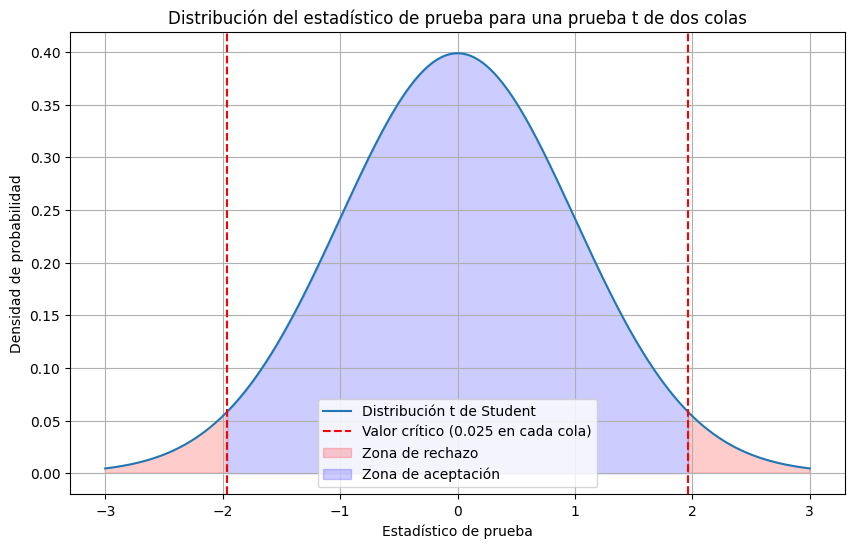

In [132]:
grados_de_libertad = 569 - 1
nivel_de_confianza = 0.95
alpha = 1 - nivel_de_confianza

valor_critico = stats.t.ppf(1 - alpha / 2, grados_de_libertad)

x = np.linspace(-3, 3, 1000)

pdf = stats.t.pdf(x, grados_de_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución t de Student')
plt.axvline(valor_critico, color='red', linestyle='dashed', label=f'Valor crítico ({alpha/2:.3f} en cada cola)')
plt.axvline(-valor_critico, color='red', linestyle='dashed')
plt.fill_between(x, 0, pdf, where=(x > valor_critico) | (x < -valor_critico), color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(x, 0, pdf, where=(x >= -valor_critico) & (x <= valor_critico), color='blue', alpha=0.2, label='Zona de aceptación')
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución del estadístico de prueba para una prueba t de dos colas')
plt.legend()
plt.grid(True)
plt.show()


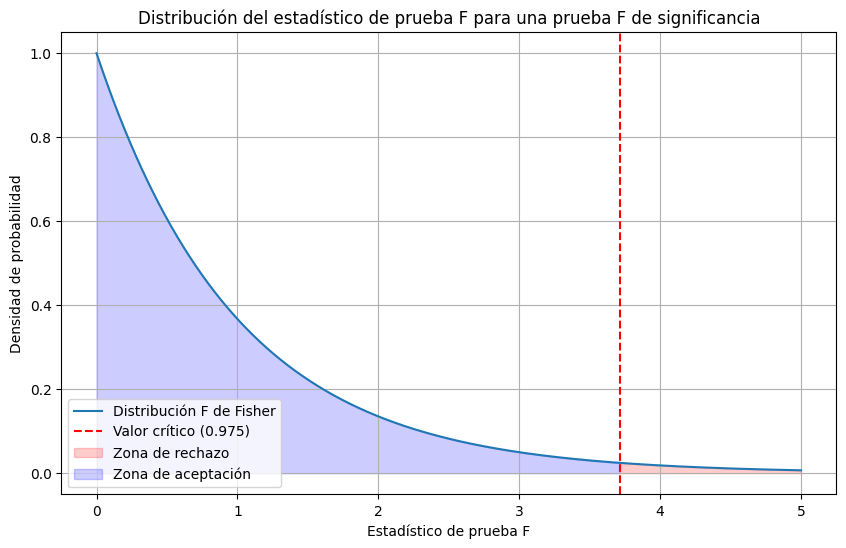

In [133]:
df_num = 2
df_den = 569 -1
nivel_de_confianza = 0.95

valor_critico = stats.f.ppf(1 - (1 - nivel_de_confianza) / 2, df_num, df_den)

x = np.linspace(0, 5, 1000)

# Calcular la distribución F de Fisher
pdf = stats.f.pdf(x, df_num, df_den)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución F de Fisher')
plt.axvline(valor_critico, color='red', linestyle='dashed', label=f'Valor crítico ({1 - (1 - nivel_de_confianza) / 2:.3f})')
plt.fill_between(x, 0, pdf, where=x > valor_critico, color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(x, 0, pdf, where=x <= valor_critico, color='blue', alpha=0.2, label='Zona de aceptación')
plt.xlabel('Estadístico de prueba F')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución del estadístico de prueba F para una prueba F de significancia')
plt.legend()
plt.grid(True)
plt.show()


In [134]:
from sklearn.model_selection import train_test_split
entrenamiento,prueba = train_test_split(df_estandar,test_size=0.20,random_state=42)

In [135]:
entrenamiento

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,1.585220,...,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,0.968562,...,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,0.069801,...,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443


In [136]:
entrenamiento.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [137]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.987e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:15   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2429.
Df Residuals:                     425   BIC:                            -2306.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable texture_worst debido a que tiene el p valor más alto

In [138]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.215e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:15   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     426   BIC:                            -2312.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable texture_se debido a que tiene el p valor más alto

In [139]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.460e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:15   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2433.
Df Residuals:                     427   BIC:                            -2318.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable concavity_worst debido a que tiene el p valor más alto

In [140]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.724e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:15   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2435.
Df Residuals:                     428   BIC:                            -2324.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable concave_points_mean debido a que tiene el p valor más alto

In [141]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.006e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:15   Log-Likelihood:                 1244.6
No. Observations:                 455   AIC:                            -2437.
Df Residuals:                     429   BIC:                            -2330.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable concave_points_worst debido a que tiene el p valor más alto

In [142]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.313e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     430   BIC:                            -2336.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable smoothness_se debido a que tiene el p valor más alto

In [143]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.642e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1244.3
No. Observations:                 455   AIC:                            -2441.
Df Residuals:                     431   BIC:                            -2342.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable compactness_se debido a que tiene el p valor más alto

In [144]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.999e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1244.1
No. Observations:                 455   AIC:                            -2442.
Df Residuals:                     432   BIC:                            -2347.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable area_se debido a que tiene el p valor más alto

In [145]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.389e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1243.8
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     433   BIC:                            -2353.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En el siguiente modelo eliminamos la variable fractal_dimension_worst debido a que tiene el p valor más alto

In [146]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.815e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1243.4
No. Observations:                 455   AIC:                            -2445.
Df Residuals:                     434   BIC:                            -2358.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

En el siguiente modelo eliminamos la variable radius_se debido a que tiene el p valor más alto

In [147]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.709e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:15:16   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     436   BIC:                            -2364.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Nos quedamos con este modelo debido a que todos los p valores son menores a 0.05, lo cual nos da un 95% de confianza.

In [148]:
y_aprox = 0 + 0.9426*prueba['perimeter_mean'] +  0.0773*prueba['area_mean'] + 0.0072*prueba['smoothness_mean'] - 0.05076*prueba ['compactness_mean'] -0.0336*prueba['concavity_mean'] + 0.0034*prueba['symmetry_mean'] + 0.0059*prueba['fractal_dimension_mean'] -0.0126*prueba['perimeter_se'] +0.0118*prueba['concavity_se'] + 0.0038*prueba['concave_points_se'] + 0.0044*prueba['symmetry_se'] -0.0045*prueba['fractal_dimension_se']  + 0.2381*prueba['radius_worst'] - 0.1208*prueba['perimeter_worst'] - 0.0833*prueba['area_worst'] - 0.0048*prueba['smoothness_worst'] + 0.0127*prueba['compactness_worst'] -0.0045*prueba['symmetry_worst']

In [149]:
tabla = pd.DataFrame({'Real':prueba['radius_mean'], 'Prediccion':y_aprox, 'Errores':prueba['radius_mean']-y_aprox})

Text(0, 0.5, 'Prediccion')

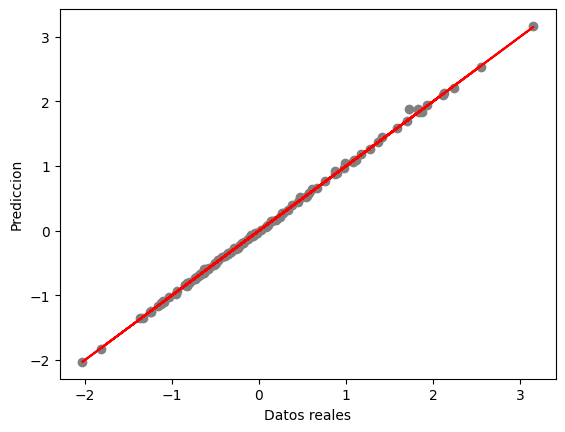

In [150]:
import matplotlib.pyplot as plt
plt.scatter(prueba['radius_mean'],y_aprox,color='gray')
plt.plot(prueba['radius_mean'],prueba['radius_mean'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

Analizando el gráfico anterior, se puede concluir que el modelo es sumamente cercano a los resultados reales.

In [151]:
l_residuos=len(tabla['Errores'])

Text(0, 0.5, 'Valor del residuo')

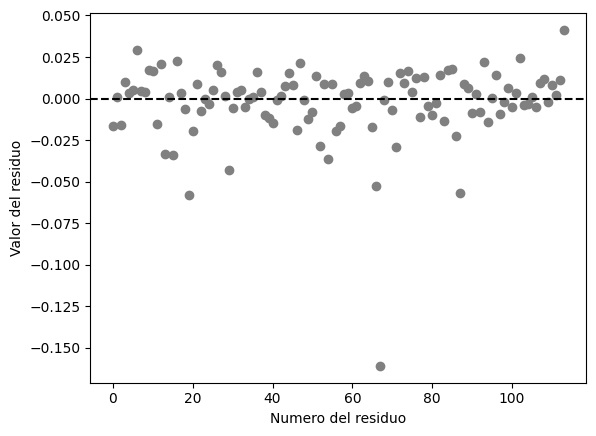

In [152]:
plt.scatter(range(l_residuos),tabla['Errores'],color='grey')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Este plot diagram de los errores nos muestra que los residuos a pesar de exisitir son sumamente pequeños, lo cual nos confirma que el modelo es bastante acertado.

Text(0, 0.5, 'Frecuencia (proba)')

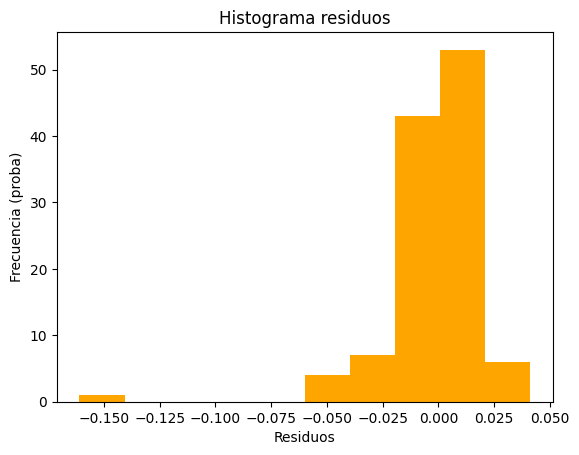

In [153]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

El histograma de errores nos indica que los residuos mas comunes se encuentran entre -0.025 y 0.025, principalmente en cero, esto confirma la gran exactitud del modelo.

In [154]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores']-media)/std

In [155]:
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.1453524208824856, pvalue=0.014484098930473381, statistic_location=-0.346055064141099, statistic_sign=-1)

El test de Kolmogorov nos indica que la discrepancia entre los resultados reales y la predicción es relativamente baja.

En conclusión, el modelo de predicción planteado se ajusta bastante bien a los resultados reales, aunque no es 100% exacto, nos brinda un 95% de confianza con errores bastante bajos.